# Woessmann - The Importance of School System

This notebook replicates results from

L. Woessmann (2016), The Importance of School Systems: Evidence from International Differences in Student Achievement.
Journal of Economic Perspectives—Volume 30, Number 3, Pages 3–32

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

## Introduction

Woessmann shows in his paper that differences in student achievement across countries are systematically related to differences in organisation and governance of school systems, such as external exit exams, autonomy of course and teacher choice. In other words, the way the school system is set up matters for student performance.


**Agenda of the paper:** 

* Woessmann first describes the size and cross-test consistency of international differences in student achievement,
* then uses an education production function to describe the relation of factors of (and beyond the) respective school system to achievement differences,
* and adds a discussion and conclusion.

The education production function used by the author is given by:

$achievement_s = \alpha family + \beta resources + \gamma institutional$
    
where achievement is the student achievement by country, which is regressed on three collapsed aggregate country level variables: family background, school resources and institutional structures of the school system

## Visualization of the Identification Strategy & Issues

As outlined before, Woessmann tries to explain the variation of student test achievement with three factors: family, resources, and institutional structures.
![title](DAG_identification.png)

Each input factor, by itself, somehow influences student achievement: within school resources, there is the amount of money allocated to the respective schools, family background is fleshed out by a student family's immigration status or their neighbourhood. Institutional structures is determined by whether students face external exit exams, whether schools may hire autonomously and may choose their teachers' salary.

However, the picture is not as simple as shown above.
![title](DAG_discussion.png)


Here comes the part about the problems talked about in the paper. Need to add a dependency achievement to school resources.

![title](DAG_discussion2.png)
This is what I think should be added as well: dependency between school system and school resources and what I call test taking: students may differ in their maturity (e.g. take this test actually seriously and not just write anything) and also might differ in their test taking ability - and if that is low, they might choose not to take it even when selected to do so and rather e.g. play ill.

## Data Analysis

After a discussion of various international tests, they select the OECD PISA test with data from 2003. PISA assesses "knowledge and skills essential for full participation in our modern society" (footnote) and draws a random sample of 15year-olds in a two-stage sampling. The dataset they work with relates school system to student achievement in 29 OECD countries.

In [9]:
# Read in the data and convert .dta file to .csv
data = pd.io.stata.read_stata('data/pisa2003_oecd_jep.dta')
data.to_csv('data/pisa2003_oecd_jep.csv')

# Create pandas Dataframe
df = pd.DataFrame(data=data)

As the author focuses on three groups of input factors: family background factors, institutional factors, and school resources, the next table is created to get a nice first look at the data.

In [3]:
# create new dataset with all the variables sorted into the higher order input factors
c_res = df[['expps', 'davailinstmat4', 'davailinstmat1', 'insttimemath', 'propcert', 'propqped']]
c_fam = df[['escs', 'age', 'female', 'dstupreprim2', 'ageprim', 'repisced1', 'repisced2', 'dgrade7', 'dgrade8', 'dgrade9', 'dgrade11', 'dgrade12', 'dliveone', 'dlivepatch', 'dliveboth', 'dworkstat4', 'dworkstat3', 'dworkstat2', 'dworkstat1', 'dhsecateg3', 'dhsecateg2', 'dhsecateg1', 'dbook2', 'dbook3', 'dbook4', 'dbook5', 'dbook6', 'dimmig2', 'dimmig3', 'dstulanguage3', 'dstulanguage4', 'dschoolloc23', 'dschoolloc4', 'dschoolloc5']]
c_ins = df[['cprivate', 'cschoolbudgetgov', 'mcentexa', 'purstudret', 'teacassprin', 'teacassextinsp', 'purcompave', 'purstudgrp', 'autstartsal', 'icautstartsal', 'autformbudget', 'icautformbudget', 'autcontent', 'icautcontent', 'authire', 'icauthire']]

df_overview = pd.concat([df['cnt'], df['pv1math'], c_res, c_fam, c_ins], axis =1, keys=['Country', 'test_score', 'School resources', 'Family Background', 'Institution'])
df_overview.head()

Country  test_score School resources                                \
      cnt     pv1math            expps davailinstmat4 davailinstmat1   
0     AUS  418.086914        59.264999            0.0            0.0   
1     AUS  446.985504        59.264999            0.0            0.0   
2     AUS  501.822693        59.264999            0.0            0.0   
3     AUS  506.807892        59.264999            0.0            0.0   
4     AUS  341.828888        59.264999            0.0            0.0   

                                 Family Background         ... Institution  \
  insttimemath propcert propqped              escs    age  ...  purcompave   
0          0.0      1.0     0.62         -0.758119  16.25  ...         0.0   
1        300.0      1.0     0.63          0.706989  15.92  ...         0.0   
2        250.0      1.0     0.90         -0.542674  16.00  ...         0.0   
3        500.0      1.0     0.68         -0.267831  15.33  ...         0.0   
4        200.0      1.0     0.62          0.021161  15.92  ...         0.0   

                                                                      \
  purstudgrp autstartsal icautstartsal autformbudget icautformbudget   
0        1.0         0.0           0.0           1.0           0.814   
1        1.0         0.0           0.0           1.0           0.814   
2        1.0         0.0           0.0           1.0           0.814   
3        1.0         0.0           0.0           1.0           0.814   
4        1.0         0.0           0.0           1.0           0.814   

                                             
  autcontent icautcontent authire icauthire  
0        1.0        0.814     0.0       0.0  
1        1.0        0.814     0.0       0.0  
2        1.0        0.814     0.0       0.0  
3        1.0        0.814     0.0       0.0  
4        1.0        0.814     0.0       0.0  

[5 rows x 58 columns]

In [13]:
# Compute mean scores by country
df['pv1math'] = df['pv1math'].astype(float)
df_for_mean_scores_by_country = df[['cnt', 'pv1math']]
df_for_mean_scores_by_country.groupby('cnt').mean()

,pv1math
cnt,
AUS,522.398177
AUT,511.663285
BEL,532.974255
CAN,521.631896
CHE,518.084312
CZE,534.831189
DEU,508.446124
DNK,513.231416
ESP,495.193090


The PISA test draws a random sample of 15-year-olds to take it; let's look at the age distribution in the data.

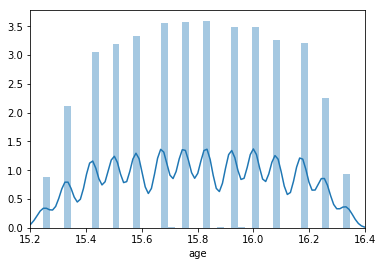

In [18]:
# Create plot for age distribution.
nonzero_entries = df['age'].where(df['age'] > 0).dropna()
ax = sns.distplot(nonzero_entries)
ax.set_xlim(15.2, 16.4)
plt.show()  

Apparently, 16-year-olds classify as 15 with PISA. There might be some time difference between selection and test-taking... Need to read up on this.

First I want to get a first impression at the distribution of math test scores in the dataset.

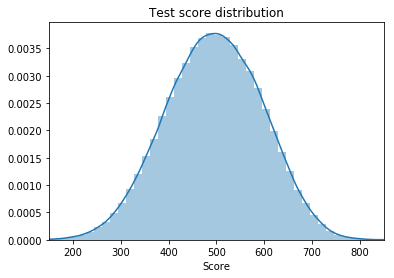

In [28]:
# Create plot for the distribution of test scores
ax = sns.distplot(df['pv1math'].astype(float))
ax.set_xlim(150, 850)
ax.set_title('Test score distribution')
ax.set_xlabel('Score')
ax.legend();

The math test scores measured by 'pv1math' looks pretty normally distributed.

As this paper is titled "The Importance of School Systems", I want to do a rough comparison between institutional factors and test scores next.

,count,unique,top,freq
more_autonomy,,,,
0.0,123665.0,5471.0,537.965393,102.0
1.0,96129.0,5061.0,482.660889,91.0


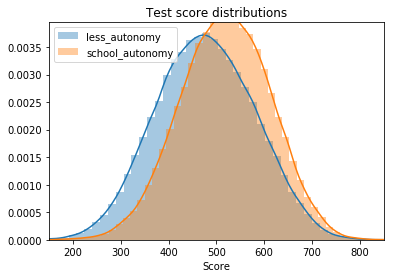

In [29]:
# Group the sample into those schools with more autonomy (may hire) and those with less.
may_hire = df['icauthire'] >= 0.5 

df['more_autonomy'] = np.nan
df.loc[~may_hire, 'more_autonomy'] = 0
df.loc[may_hire, 'more_autonomy'] = 1

# create table and plot for the distribution to compare the two groups
%matplotlib inline
ax = sns.distplot(df['pv1math'][~may_hire], label='less_autonomy')
ax = sns.distplot(df['pv1math'][may_hire], label='school_autonomy')
ax.set_xlim(150, 850)
ax.set_title('Test score distributions')
ax.set_xlabel('Score')
ax.legend();

df.groupby('more_autonomy')['pv1math'].describe()


There clearly is a difference in test scores between schools of the two groups. D, here, is the treatment: a school may choose by itself whom to hire or not. I need to add a more thourough description of 'icauthire'.

,count,unique,top,freq
more_autonomy,,,,
0.0,182771.0,5707.0,537.965393,145.0
1.0,37023.0,4457.0,527.839172,37.0


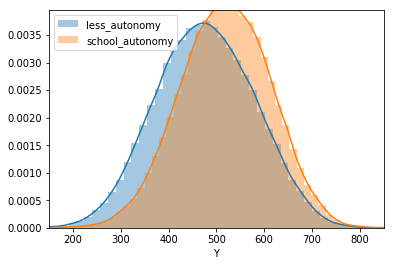

In [21]:
# Group the sample into those schools with more autonomy (here:choose the starting salary) and those with less.
choose_salary = df['icautstartsal'] >= 0.5 
df['Y'] = df['pv1math']

df['more_autonomy'] = np.nan
df.loc[~choose_salary, 'more_autonomy'] = 0
df.loc[choose_salary, 'more_autonomy'] = 1

ax = sns.distplot(df['Y'][~may_hire], label='less_autonomy')
ax = sns.distplot(df['Y'][may_hire], label='school_autonomy')
ax.set_xlim(150, 850)
ax.legend();

df.groupby('more_autonomy')['pv1math'].describe()

Instead of seeing whether the schools could hire as they pleased, autonomy here is proxied by to which degree schools can choose the starting salary of teachers. The graph looks pretty similar to the other one: Again, those schools with higher autonomy have students with higher test scores.

## Replication

This is the reproduction.
First, all the different variables for family background, school resources, and institutional system need to be collapsed into the three aggregated country level input factors. 

In order to do this, the authors used the student-level estimation on indiidual variables to combine those into one factor, e.g.

$family = \sum x_{i} * student \beta_{i}$

where x are the individual family background variables and the student $\beta$s are the respective coefficient estimates.
The three input factors are then collapsed to the level of the 29 OECD country observations to get three aggregate country level variables.

The following reproduces Table 2. Explanation what that table is for.

In [4]:
# Do a Weighted Least Squares Estimation
y=df['pv1math']
X=df[['expps', 'davailinstmat4', 'davailinstmat1', 'insttimemath', 'propcert', 'propqped', 'escs', 'age', 'female', 'dstupreprim2', 'ageprim', 'repisced1', 'repisced2', 'dgrade7', 'dgrade8', 'dgrade9', 'dgrade11', 'dgrade12', 'dliveone', 'dlivepatch', 'dliveboth', 'dworkstat4', 'dworkstat3', 'dworkstat2', 'dworkstat1', 'dhsecateg3', 'dhsecateg2', 'dhsecateg1', 'dbook2', 'dbook3', 'dbook4', 'dbook5', 'dbook6', 'dimmig2', 'dimmig3', 'dstulanguage3', 'dstulanguage4', 'dschoolloc23', 'dschoolloc4', 'dschoolloc5', 'cprivate', 'cschoolbudgetgov', 'mcentexa', 'purstudret', 'teacassprin', 'teacassextinsp', 'purcompave', 'purstudgrp', 'autstartsal', 'icautstartsal', 'autformbudget', 'icautformbudget', 'autcontent', 'icautcontent', 'authire', 'icauthire']]


mod_wls = sm.WLS(y, X.astype(float), weights=df['newwgt'])
res_wls = mod_wls.fit()
print(res_wls.summary())
# I get different estimates, though close by.

                            WLS Regression Results                            
Dep. Variable:                pv1math   R-squared:                       0.974
Model:                            WLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.494e+05
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        08:45:18   Log-Likelihood:            -1.3479e+06
No. Observations:              219794   AIC:                         2.696e+06
Df Residuals:                  219738   BIC:                         2.697e+06
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
expps                0.2842      0.011  

In [18]:
# In-sample Prediction
ypred = res_wls.predict(X)
lc = ypred

# Do a linear prediction for each of the three higher level input factors 
fam = 0
ins = 0
weights = df['newwgt']

for i in range(6):
    res = 0
    res += df['newwgt']*(res_wls.params[i]*c_res.astype(float).iloc[:,i])
for i in range(6,40):
    for j in range(34): 
        fam += df['newwgt']*(res_wls.params[i]*c_fam.astype(float).iloc[:,j])
for i in range(40, 56):
    for j in range(16):
        ins += df['newwgt']*(res_wls.params[i]*c_ins.astype(float).iloc[:,j])

# Build a new DataFrame 
new_df = pd.concat([df['cnt'], df['pv1math'], ypred, fam, res, ins, lc], axis =1).rename({'cnt': 'Country'})
new_df
# Problem: column labels are wrong.

,cnt,pv1math,0,1,2,3,4
0,AUS,418.086914,393.376,109.976013,0.161986,22.342840,393.376
1,AUS,446.985504,577.025,374.924488,0.548662,74.476264,577.025
2,AUS,501.822693,490.924,428.858007,0.783803,74.476264,490.924
3,AUS,506.807892,507.033,381.052099,0.592207,74.476264,507.033
4,AUS,341.828888,520.154,393.428854,0.539953,74.476264,520.154
5,AUS,477.286194,538.132,366.614859,0.531244,74.476264,538.132
6,AUS,438.261414,486.872,375.104474,0.583498,74.476264,486.872
7,AUS,428.135193,499.597,342.255548,0.531244,74.476264,499.597
8,AUS,590.076294,421.744,371.148129,0.557371,74.476264,421.744
9,AUS,420.190094,532.64,356.463767,0.592207,74.476264,532.64


In [19]:

# Last, I have to collapse them (groupby-command)
# STATA command: collapse pv1math ypred fam res ins lc [w=newwgt], by(cnt)
new_df.groupby(['cnt']).mean()

,1,2,3
cnt,,,
AUS,385.464878,0.708956,91.814757
AUT,1101.061797,1.432622,105.764149
BEL,575.167058,0.489552,82.236486
CAN,174.933504,0.334434,37.308297
CHE,615.005206,0.716444,75.282484
CZE,806.229488,1.389337,237.901757
DEU,1114.178730,1.614954,127.283344
DNK,1223.734272,2.299949,263.663865
ESP,459.804090,0.209033,54.776197


The following reproduces Table 3. Explanation of that table.

In [8]:

# STATA command:
# reg pv1math fam res ins
# reg pv1math fam
# reg pv1math res
# reg pv1math ins
# reg pv1math res ins
# reg pv1math fam ins
# reg pv1math fam res

The following replicates Table 4. Explanation of that table.

In [9]:

# STATA command:
# for var pv1math fam res ins: qui sum X \ replace X=X-r(mean)
# qui reg pv1math fam res ins
# predict xb_resid, res
# predict xb_xb, xb
# matrix coefs = e(b)
# scalar sf=coefs[1,1]
# scalar sr=coefs[1,2]
# scalar si=coefs[1,3]
# gen xb_fam = sf*fam
# gen xb_res = sr*res
# gen xb_ins = si*ins
# gen h = -pv1math
# sort h
# keep cnt pv1math xb_resid sb_sb sb_fam sb_res xb_ins
# list